In [1]:
# Install a pip package in the current Jupyter kernel
!python --version
import sys
!{sys.executable} -m pip install numpy pandas matplotlib

Python 3.10.2


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
def calculate_mean(q, method,table):
    global resultdirs
    resdir = resultdirs[method]
    url = f'https://raw.githubusercontent.com/lordpretzel/prov_semanticopt_experiment/master/{resdir}/runtime_{q}_{table}_{method}.csv'
    df = pd.read_csv(url, header=None, delimiter=',')
    df = df.set_axis(["time"], axis=1)
    return df['time'].mean()

allmethods = ['flatten', 'unopt', 'unoptheu', 'opt', 'optnoflat', 'optheu']
allqueries = ['01','02','03', '04', '05', '06', '07', '08', '09','10','11', '14', '17', '19', '20'] # ,'02','03']
resultdirs = { x: "results_n1" for x in  ['flatten', 'unopt', 'opt', 'optnoflat'] }
resultdirs |= { x: "testopt_results" for x in ['unoptheu', 'optheu'] }

queries = {
    "01": ["lineitem"],
    "02": ["nation", "part", "partsupp", "region"],
    "03": ["customer", "lineitem", "orders"],
    "04": ["lineitem"], #"orders"],
    "05": ["customer", "lineitem", "nation", "orders", "region"],
    "06": ["lineitem"],
    "07": ["customer", "lineitem", "nation", "orders", "supplier"],
    "08": ["customer", "nation", "part", "supplier"],
    "09": ["lineitem", "nation", "orders", "part", "partsupp", "supplier"],
    "10": ["customer", "lineitem", "nation", "orders"],
    "11": ["nation", "partsupp", "supplier"],
    "12": ["lineitem", "orders"],
    "13": ["customer", "orders"],
    "14": ["lineitem", "part"],
    "15": ["lineitem", "supplier"],
    "16": ["part", "partsupp", "supplier"],
    "17": ["lineitem", "part"],
    "18": ["customer", "lineitem", "orders"],
    "19": ["lineitem", "part"],
    "20": ["part"],
    }

In [8]:
allresult = {}
for q in allqueries: #['01','02', ...
    allresult[q] = {} #has to exist before assigning sub-whatever
    for table in queries[q]: #[part,region, ...]
        resultsforq = {}
        for method in allmethods: # ['flatten', 'unopt', 'opt'] 
            try:
                mean = calculate_mean(q,method,table)
                resultsforq[method] = mean
                #print(resultsforq)
            except Exception as e:
                print(f"ERROR {q} for {table} using {method}:\n\n{e}")
        #print(allresult)
        allresult[q][table] = resultsforq
allresult 

ERROR 07 for nation using unoptheu:

HTTP Error 404: Not Found


ERROR 07 for nation using optheu:

No columns to parse from file


ERROR 07 for orders using unoptheu:

HTTP Error 404: Not Found


ERROR 07 for orders using optheu:

HTTP Error 404: Not Found


{'01': {'lineitem': {'flatten': 11666.41324,
   'unopt': 10713.953040000002,
   'unoptheu': 11660.804,
   'opt': 11659.871060000001,
   'optnoflat': 10664.90242,
   'optheu': 11723.083}},
 '02': {'nation': {'flatten': 1126.15758,
   'unopt': 54.675190000000015,
   'unoptheu': 164.94,
   'opt': 865.7344400000001,
   'optnoflat': 48.84674000000001,
   'optheu': nan},
  'part': {'flatten': 1083.7634699999999,
   'unopt': 53.47806,
   'unoptheu': 54.743,
   'opt': 17.057669999999998,
   'optnoflat': 47.268600000000006,
   'optheu': nan},
  'partsupp': {'flatten': 1083.46696,
   'unopt': 52.75401000000001,
   'unoptheu': 54.988,
   'opt': 874.28151,
   'optnoflat': 49.688050000000004,
   'optheu': nan},
  'region': {'flatten': 1111.1686999999997,
   'unopt': 57.28273,
   'unoptheu': 54.44,
   'opt': 844.9275700000002,
   'optnoflat': 50.13236,
   'optheu': nan}},
 '03': {'customer': {'flatten': 5.163239999999999,
   'unopt': 5.41712,
   'unoptheu': 5.422,
   'opt': 4.08369,
   'optnoflat': 

In [30]:
dfs = {}
usemethods=allmethods
for q in allqueries:
    qdata = allresult[q]
    qdict = { k: [] for k in usemethods } # allmethods }
    tables = qdata.keys()
    for t in qdata:
        for m in usemethods:
            val = qdata[t][m] if m in qdata[t] else np.nan
            val = val if val > 0.0 else np.nan
            qdict[m] = qdict[m] + [val]
    dfs[q] = pd.DataFrame(data=qdict, index=tables)
    dfs[q] = round(dfs[q])
dfs

{'01':           flatten    unopt  unoptheu      opt  optnoflat   optheu
 lineitem  11666.0  10714.0   11661.0  11660.0    10665.0  11723.0,
 '02':           flatten  unopt  unoptheu    opt  optnoflat  optheu
 nation     1126.0   55.0     165.0  866.0       49.0     NaN
 part       1084.0   53.0      55.0   17.0       47.0     NaN
 partsupp   1083.0   53.0      55.0  874.0       50.0     NaN
 region     1111.0   57.0      54.0  845.0       50.0     NaN,
 '03':           flatten  unopt  unoptheu  opt  optnoflat  optheu
 customer      5.0    5.0       5.0  4.0        4.0     4.0
 lineitem      5.0    5.0       5.0  4.0        3.0     3.0
 orders        5.0    5.0       5.0  3.0        3.0     3.0,
 '04':           flatten   unopt  unoptheu    opt  optnoflat  optheu
 lineitem    948.0  3482.0     458.0  948.0     3469.0   458.0,
 '05':           flatten  unopt  unoptheu    opt  optnoflat  optheu
 customer    474.0  476.0     293.0  476.0      477.0   318.0
 lineitem    486.0  484.0     30

In [31]:
bestdfs = {}
for q in allqueries:
   df = dfs[q].copy()
   df['nonopt-best'] = df[['flatten','unopt','unoptheu']].min(axis=1)
   df['opt-best'] = df[['opt','optnoflat','optheu']].min(axis=1) 
   df = df.drop(columns=['opt','optnoflat','flatten','unopt'])
   cols = ['nonopt-best', 'opt-best']
   df = df[cols]
   bestdfs[q] = df
bestdfs

{'01':           nonopt-best  opt-best
 lineitem      10714.0   10665.0,
 '02':           nonopt-best  opt-best
 nation           55.0      49.0
 part             53.0      17.0
 partsupp         53.0      50.0
 region           54.0      50.0,
 '03':           nonopt-best  opt-best
 customer          5.0       4.0
 lineitem          5.0       3.0
 orders            5.0       3.0,
 '04':           nonopt-best  opt-best
 lineitem        458.0     458.0,
 '05':           nonopt-best  opt-best
 customer        293.0     318.0
 lineitem        300.0     301.0
 nation          286.0     288.0
 orders          294.0     292.0
 region          285.0     287.0,
 '06':           nonopt-best  opt-best
 lineitem          0.0       0.0,
 '07':           nonopt-best  opt-best
 customer       2290.0    4291.0
 lineitem       2356.0    3470.0
 nation         4149.0   27603.0
 orders         3632.0   10513.0
 supplier       2320.0    4269.0,
 '08':           nonopt-best  opt-best
 customer        510.

# All data together and compute stats

In [21]:
# ignoring q7 for now
merged_df = pd.concat([ dfs[q] for q in dfs.keys() if q != '07' ])
merged_df['nonopt-best'] = merged_df[['flatten','unopt']].min(axis=1)
merged_df['opt-best'] = merged_df[['opt','optnoflat']].min(axis=1) 

total_df = merged_df[['nonopt-best','opt-best']].sum()
relative = merged_df.copy()
relative['min'] = relative.min(axis=1)
for c in merged_df.columns:
    relative[c] = relative[c] / relative['min']

relative_avg = relative.mean()    
    
#print(total_df)
print(relative_avg)


flatten               inf
unopt                 inf
unoptheu         1.378487
opt                   inf
optnoflat             inf
optheu                inf
nonopt-best           inf
opt-best              inf
min            629.179487
dtype: float64


In [22]:
def plotquery(df, ax, show=False):
    tables = list(df.index)
    series = df.columns.to_list()
    numbars = len(series)
    x = np.arange(len(tables))  # the label locations
    width = 0.3  # the width of the bars

    rects = {}
    for i, m in enumerate(series):
        rects[m] = ax.bar(x - width/2 + (width/numbars)*i, df[m], width/4, label=m)
        ax.bar_label(rects[m], padding=3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Runtime (msec)')
    ax.set_title('Capture Runtime ' + q)
    ax.set_xticks(x, tables)
    ax.legend()
    if show:
        plt.show()

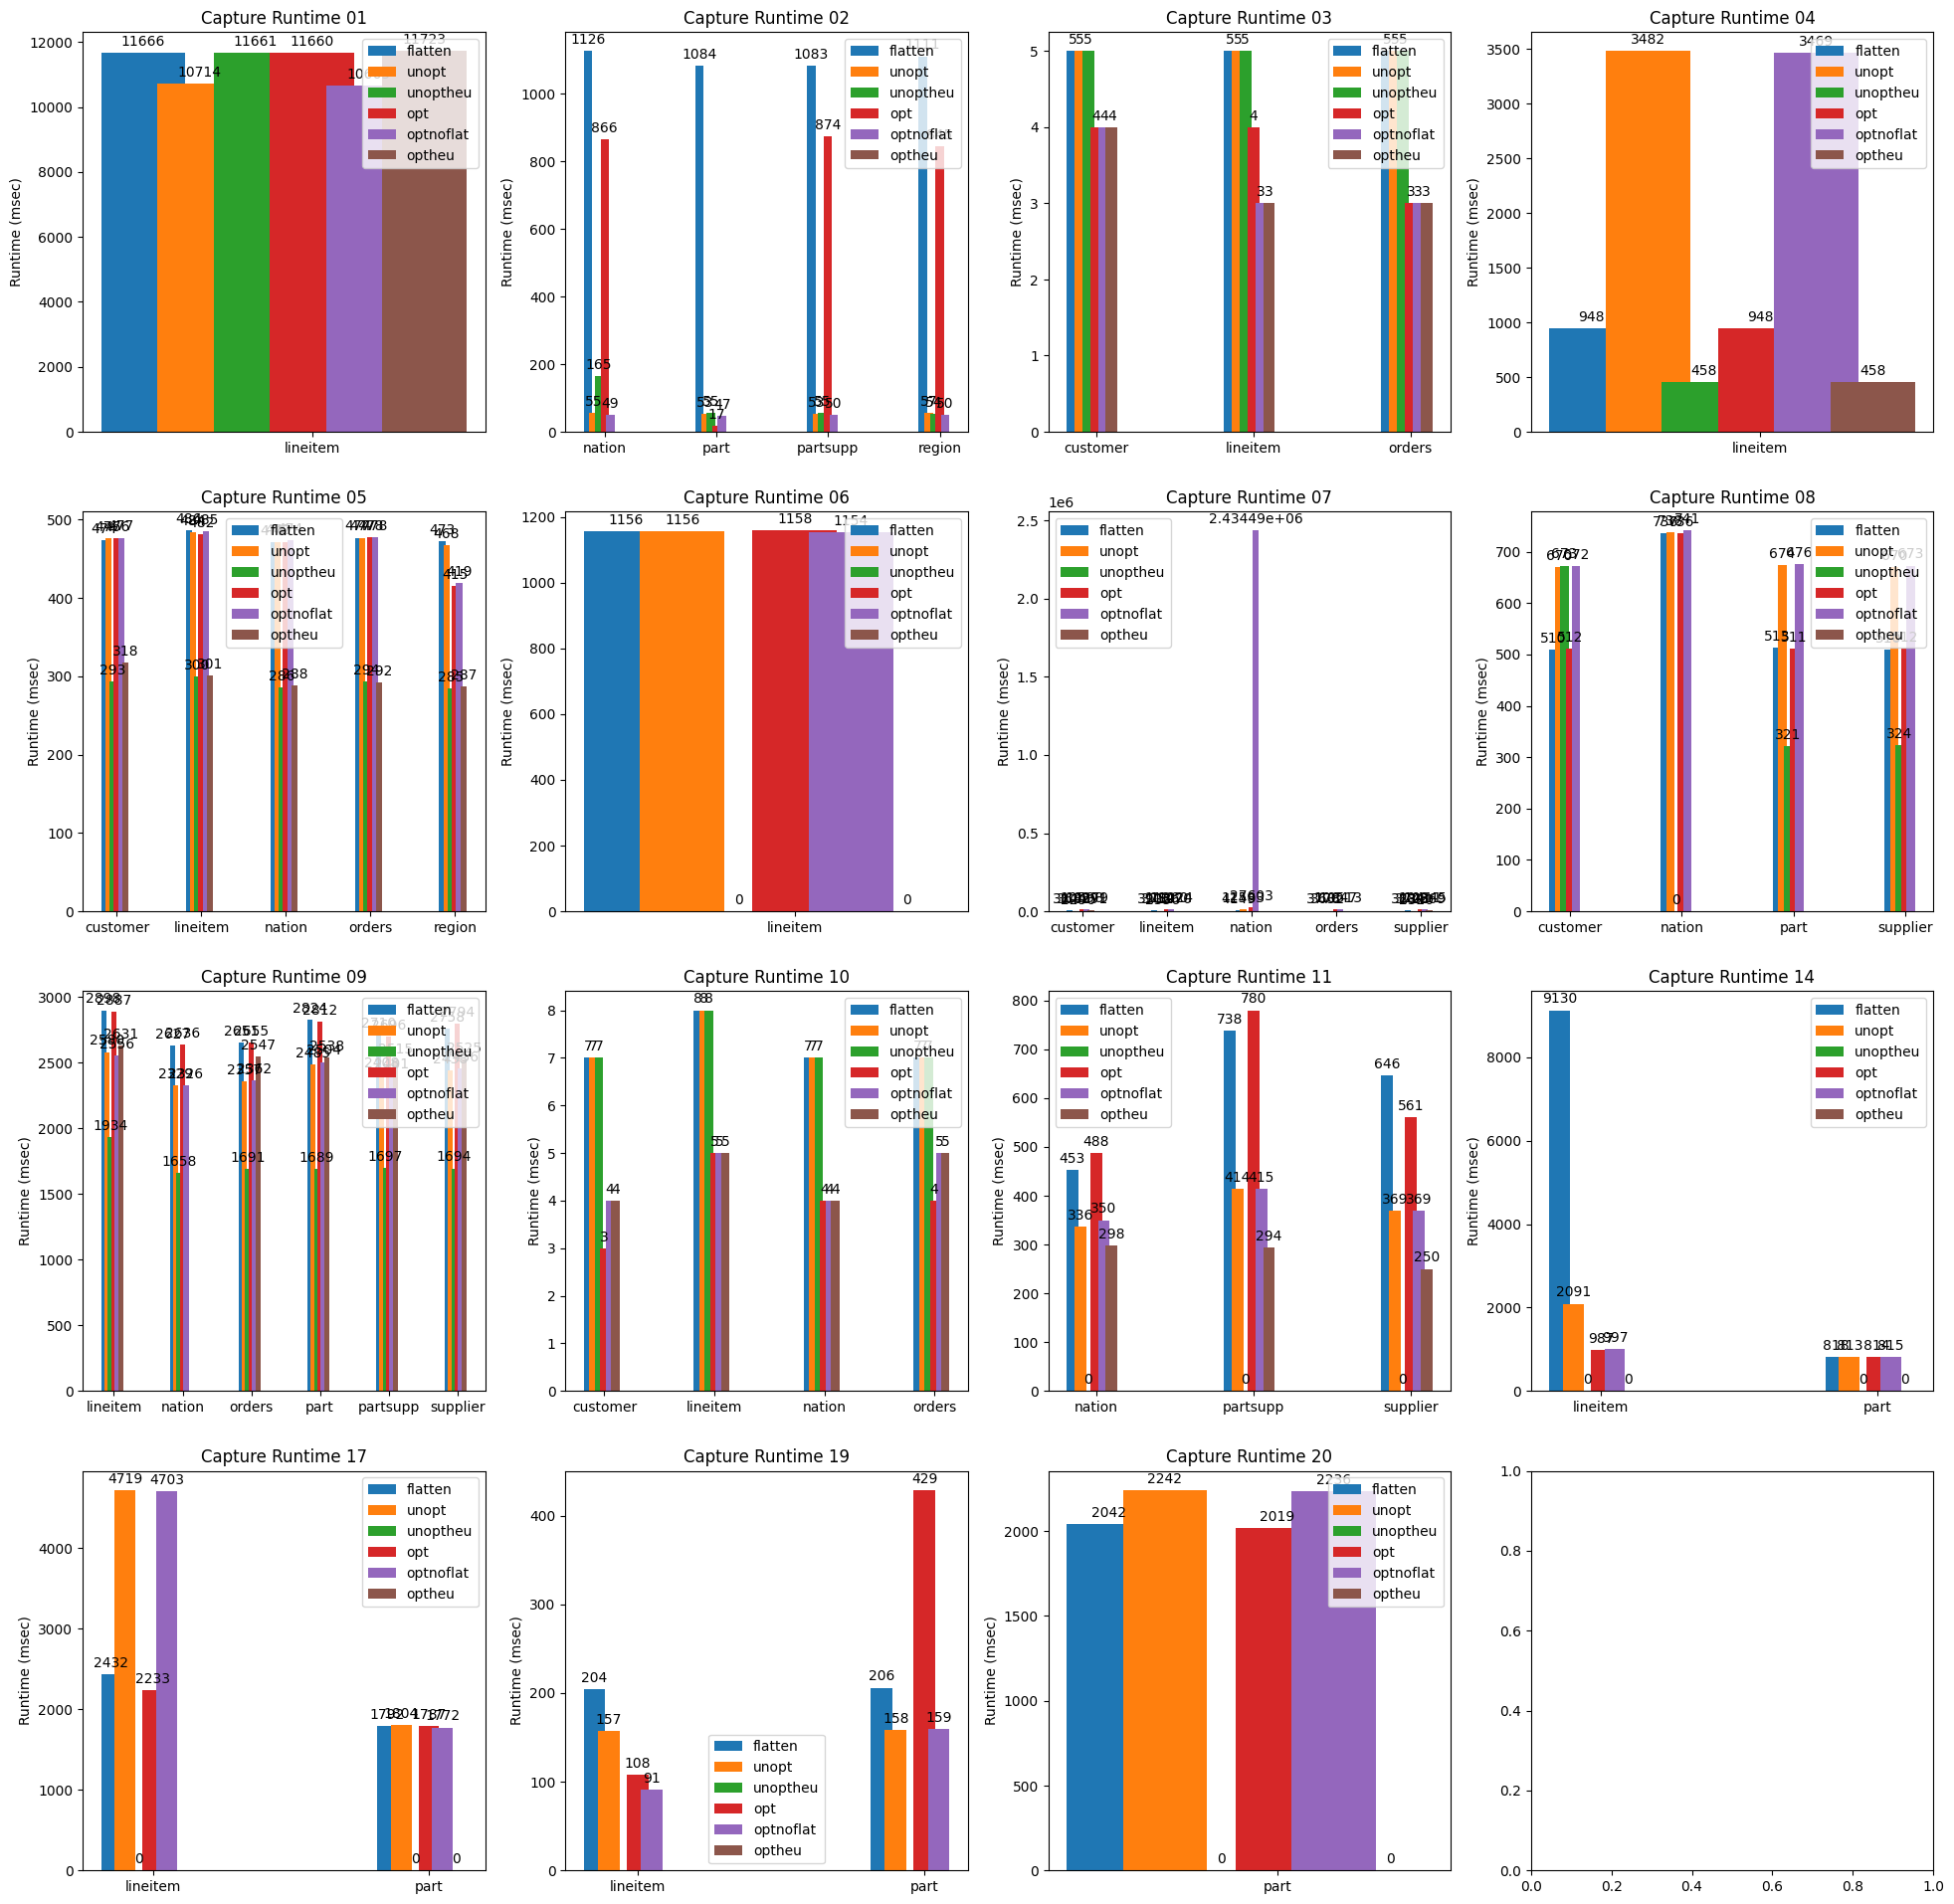

In [32]:
x, y = 4,4
scale = 6
plotfile = 'qplots.pdf'
plt.rcParams["figure.figsize"] = [scale * x, scale * y]
fig, axs = plt.subplots(y,x)
axs = [ item for a in axs for item in a ]

for qpos, q in enumerate(allqueries):
    plotquery(dfs[q], axs[qpos])

if os.path.exists(plotfile):
    os.remove(plotfile)
plt.savefig(plotfile, format='pdf')


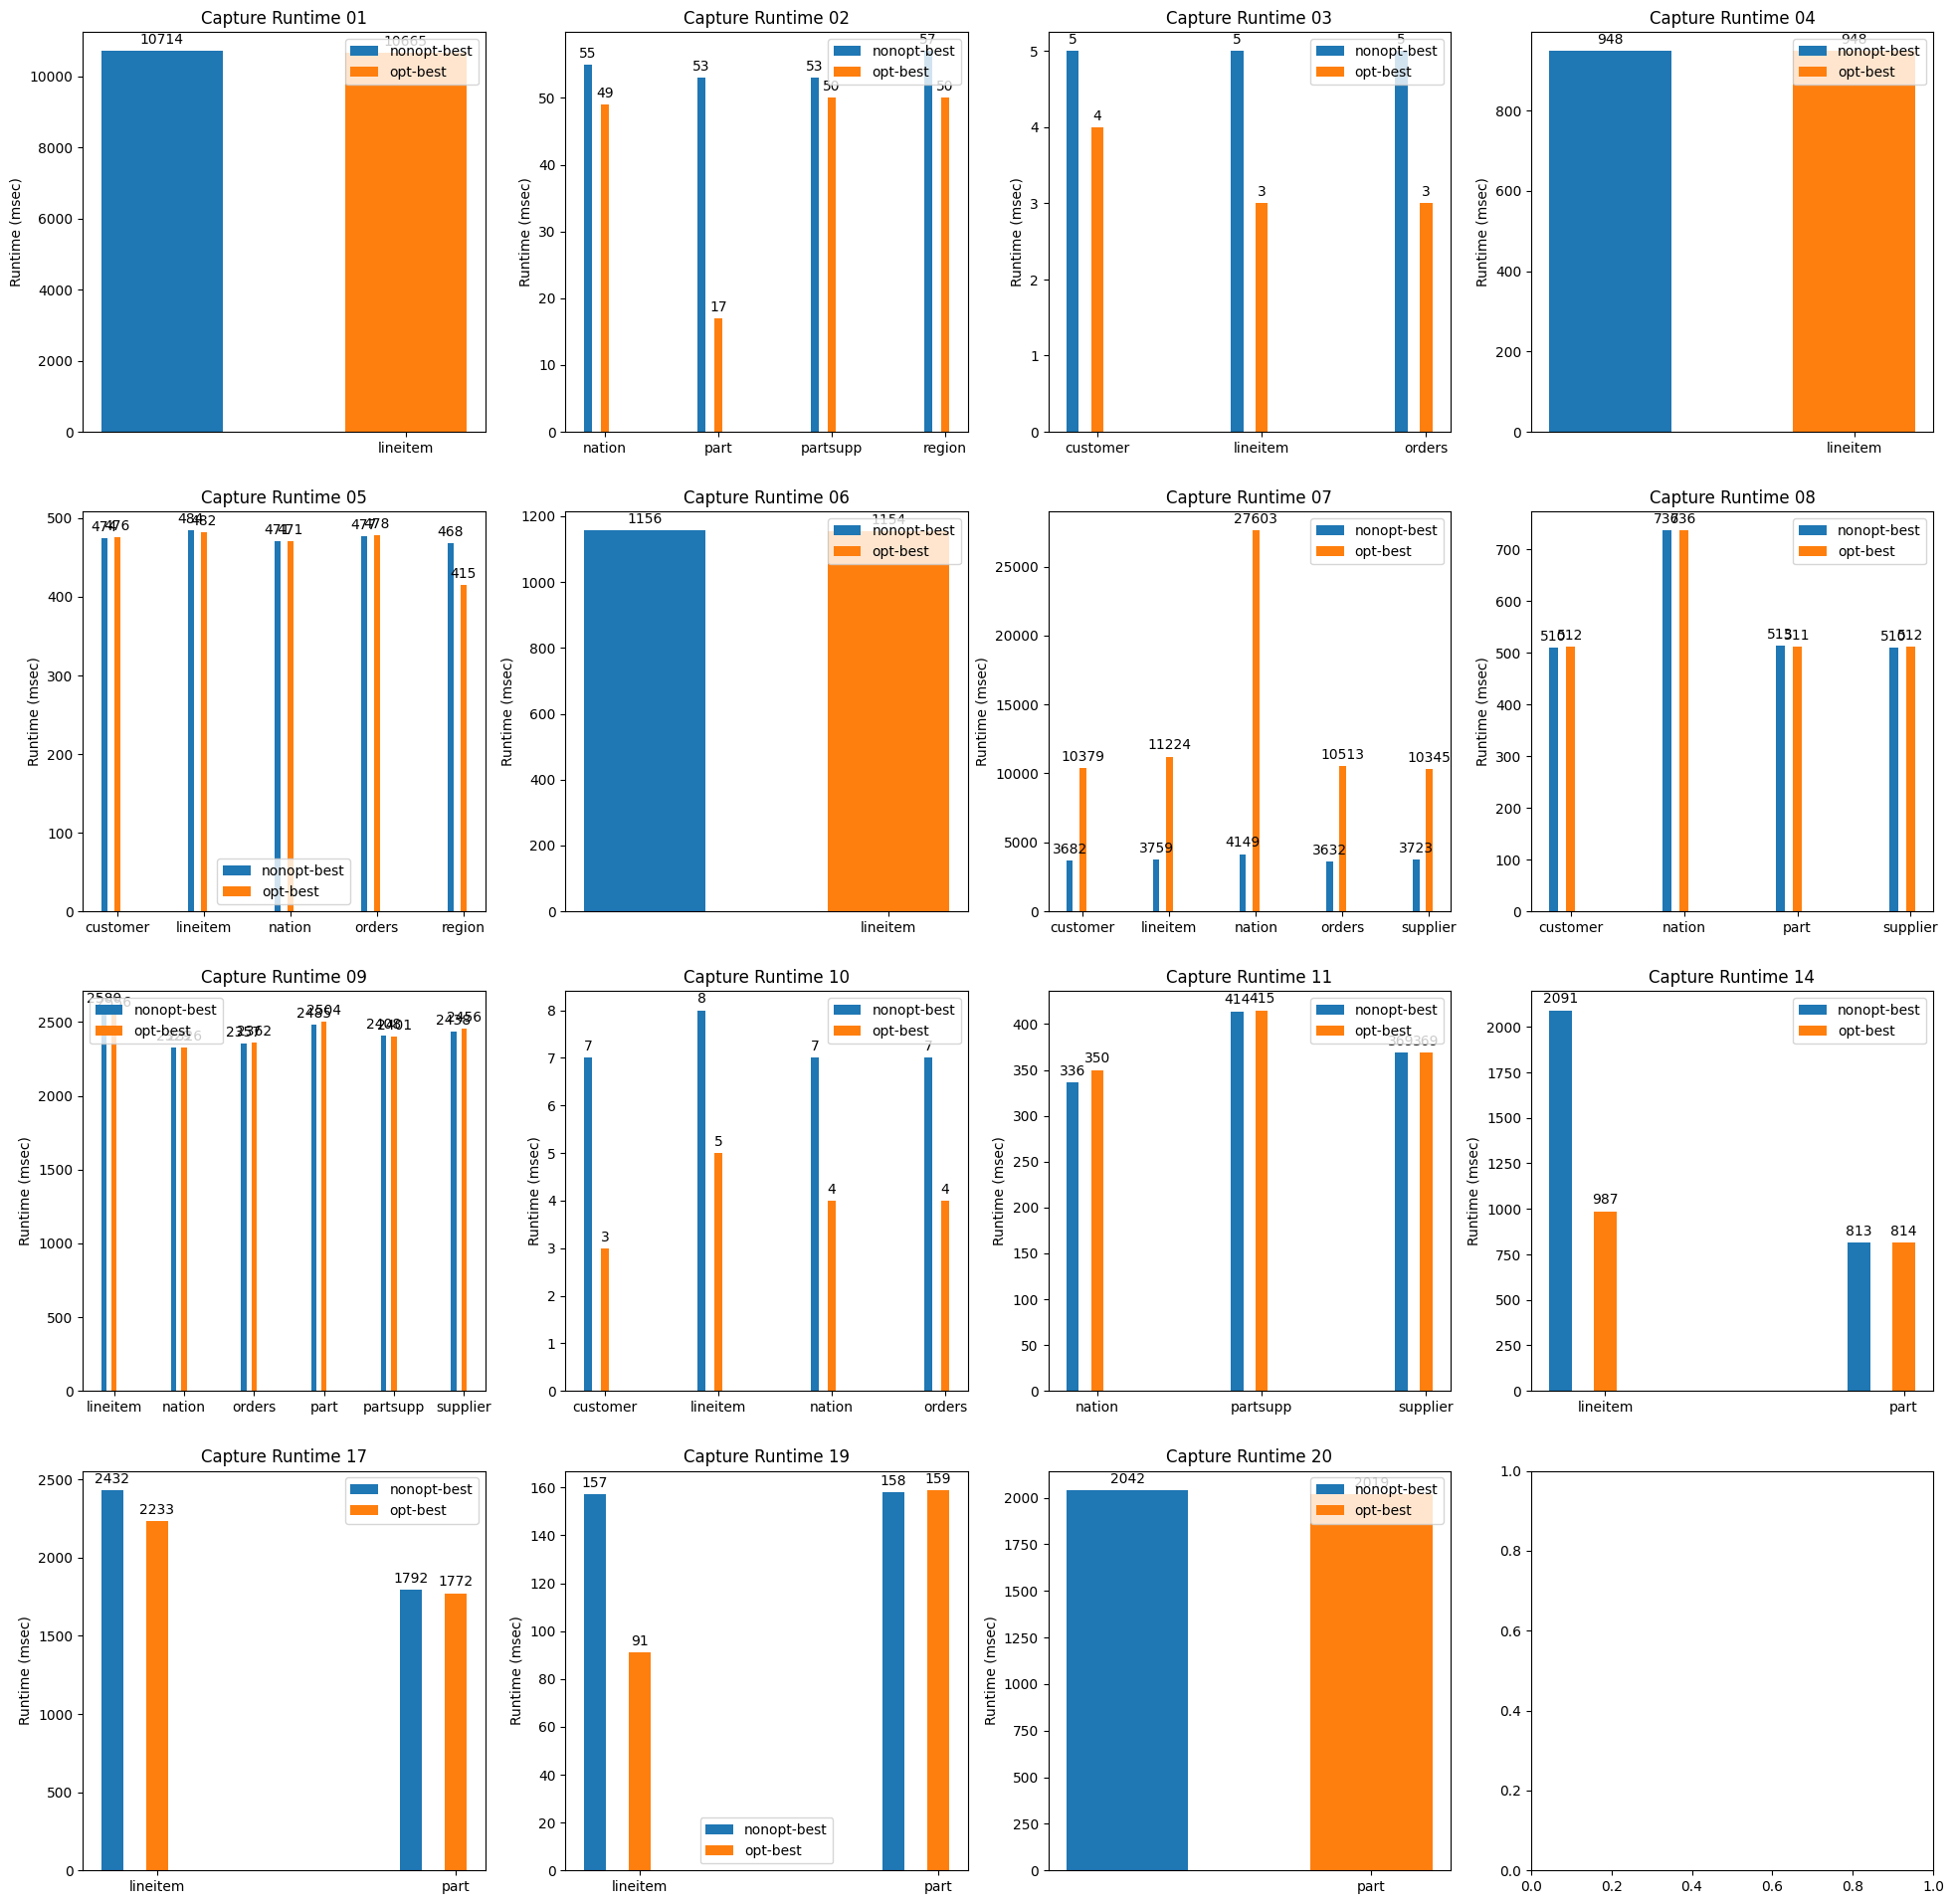

In [53]:
x, y = 4,4
scale = 6
plotfile = 'qplots-best.pdf'
plt.rcParams["figure.figsize"] = [scale * x, scale * y]
fig, axs = plt.subplots(y,x)
axs = [ item for a in axs for item in a ]

for qpos, q in enumerate(allqueries):
    plotquery(bestdfs[q], axs[qpos])

if os.path.exists(plotfile):
    os.remove(plotfile)
plt.savefig(plotfile, format='pdf')